# Introduction Grouping
Let's use some sales for these examples: \
https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'train.csv', low_memory=False, parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
dfg = df.groupby(by='Store')
store_avg = dfg.mean(numeric_only=True)

In [5]:
store_avg.head(2)

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282


In [6]:
# store has become index, to reset back simply do
store_avg.reset_index(inplace=True)

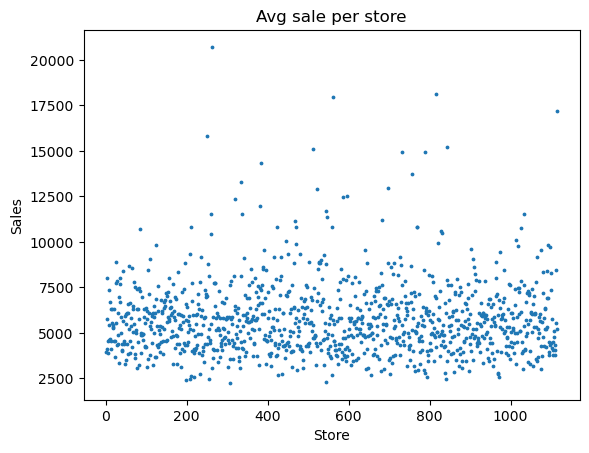

In [7]:
store_avg.plot.scatter(x='Store', y='Sales', s=3, title='Avg sale per store');

## Multiple groups

In [8]:
store_day = df.groupby(by=['Store', 'DayOfWeek'], as_index=False).mean(numeric_only=True)
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


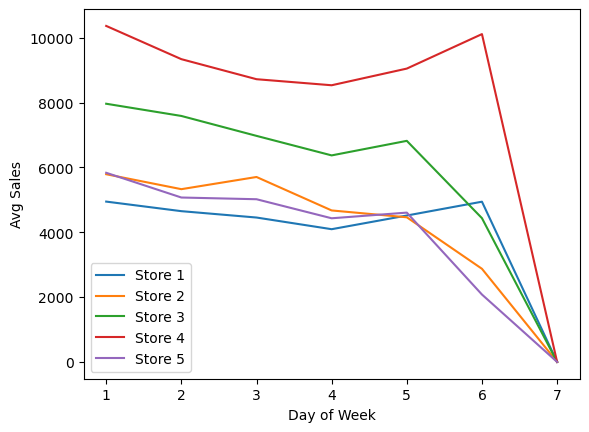

In [9]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f"Store {store}")
    plt.xlabel('Day of Week')
    plt.ylabel('Avg Sales')
    plt.legend();

## Continous grouping?

In [10]:
df.groupby('Sales').mean(numeric_only=True).shape

(21734, 6)

In [11]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [12]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df['SalesGroup'] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [13]:
df.groupby(['Store', 'SalesGroup'], observed=False).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  2              2
                           4              2
                           6              2
                           3              1
                           7              0
Name: count, Length: 46830, dtype: int64

In [14]:
df.groupby(['Store', 'SalesGroup'], observed=False).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6690 rows x 7 columns]

In [15]:
df.groupby(['Store', 'SalesGroup', 'DayOfWeek'], observed=False).count()

Date  Sales  Customers  Open  Promo  \
Store SalesGroup         DayOfWeek                                        
1     (-0.001, 2000.0]   1             6      6          6     6      6   
                         2             1      1          1     1      1   
                         3             3      3          3     3      3   
                         4            11     11         11    11     11   
                         5             6      6          6     6      6   
...                                  ...    ...        ...   ...    ...   
1115  (10000.0, 50000.0] 3             1      1          1     1      1   
                         4             2      2          2     2      2   
                         5             7      7          7     7      7   
                         6             2      2          2     2      2   
                         7             0      0          0     0      0   

                                    StateHoliday  SchoolHoliday  
Store SalesGroup         DayOfWeek                               
1     (-0.001, 2000.0]   1                     6              6  
                         2                     1              1  
                         3                     3              3  
                         4                    11             11  
                         5                     6              6  
...                                          ...            ...  
1115  (10000.0, 50000.0] 3                     1              1  
                         4                     2              2  
                         5                     7              7  
                         6                     2              2  
                         7                     0              0  

[46830 rows x 7 columns]

We can also use crosstab and pivot for these, we'll get to that in a later chapter, so get keen.

## Recap
- groupby
- reset_index
- cut
- unstack

In [17]:
df.DayOfWeek

0          5
1          5
2          5
3          5
4          5
          ..
1017204    2
1017205    2
1017206    2
1017207    2
1017208    2
Name: DayOfWeek, Length: 1017209, dtype: int64